## Using Cox regression to predict death by heart failure

Heart failure is a clinical syndrome characterised by a reduced ability of the heart to pump or fill with blood. This leads to fatigue, shortness of breath and poor quality of life. Patients with heart failure have a high mortality rate, and various biostatistical methods as well as machine learning methods have been applied to predict heart failure deaths from patients' medical records.

In this notebook, we use Cox regresstion to analyse a data set of medical records for 299 Pakistani patients with heart failure. The dataset was originally collected and presented in a research paper by [Ahmad et al.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001). and analysed using Cox regression similar to this notebook.

It has subsequently been re-analysed in other research by [Zahid et al.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0210602) for the risk factor of gender, and Chris Cave and me in the following research paper: [Wilstrup and Cave](https://www.researchsquare.com/article/rs-149966/v1) where we demonstrate an improvement using QLattice symbolic regression.

In this notebook we are essentially reproducing the findings of Ahmad et al.

# Cox models
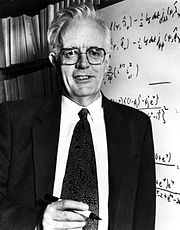

The Cox proportional hazards model was first developed by [Sir David Cox](https://en.wikipedia.org/wiki/David_Cox_(statistician)) in 
1972 and presented in a very influential [research paper](https://doi.org/10.1111/j.2517-6161.1972.tb00899.x) in the Journal of the Royal Statistical Society.

# Lifelines
Lifelines is a Python package that allows us to fit and use Cox models. It is not by default avaliable on Kaggle, so we start by installing it using pip

In [ ]:
!pip install lifelines

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter # The Cox proportional hazard model

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data
Read in the data and have a quick look at it

In [ ]:
df = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df

# Summary statistics

The dataset contains the following potential risk factors: age,serum  sodium, serum creatinine, gender, smoking, blood pressure  (BP),  ejection fraction (EF), anaemia, platelets, and creatinine phosphokinase (CPK). Let's check the summary statistics for the data.

In [ ]:
df.describe().T

# Create model
We instantiate a Cox Proportional Hazard Model

In [ ]:
cph = CoxPHFitter()

# Fit it
The model needs to be fitted to the data respecting censoring, so we specify the event to predict, and the time the occurence or non-occurence of the event was last obeserved

In [ ]:
cph.fit(df, duration_col='time', event_col='DEATH_EVENT')

The output message about *right-censoring* from the fitting means that 203 individual had not died at the time of their follow-up examination at the hospital. From the summary statistics above we know that the mean follow-up period was 130 days, but ranging from 4 to 285 days. The varying follow-up period for the individual patients is why we cannot treat this as a classification problem.

It's an important point that the time column records the *number of days until death* for the patients that died, but the number of days until the last follow-up, for the patients that *did not* yet die. This is what allows the Cox model to determine the risk of death over time, rather than as a point event.

# Risk factors
Lets plot the individual risk factors

In [ ]:
cph.plot()

We see that high blood pressure, anaemia, serum creatinine, age and ejection fraction are all within the 95% confidence interval of affecting HF death.

# Evaluation
The most common way to meassure the performance of a Cox model is to use the Concordance index or C-index. The C-index for a survival model can be thought of as the weighted average of the area under time-specific Receiver Operating Characteristic (ROC) curves.

In [ ]:
cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"], decimals=3)

# Using a survival model
A survival model will allow us to etimate how likely a person is to survive or die over time. As an example, we well plot the expeted survival fuction for individual #5 and #42 in the dataset

In [ ]:
cph.predict_survival_function(df.loc[5]).plot(title="Survival probability for individual 5 over time");

In [ ]:
cph.predict_survival_function(df.loc[42]).plot(title="Survival probability for individual 42 over time");

Individual #5 has a pretty poor outlook, while #42 has a good chance of surviving for half a year or more

# Conclusion

It is possible to extimate the survival functions with reasulable accuracy (C-index) for individuals with heart failure